<a href="https://colab.research.google.com/github/Padmaja2709/Customer-Churn-Analysis/blob/main/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Classroom/Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


REPLACE AND RENAME


In [140]:
df = df.rename (columns= ({'customerID':'CustomerID',"gender":"Gender","tenure":"Tenure"}))
df['TotalCharges']= df['TotalCharges'].replace(' ', '0')
df['TotalCharges']= df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replaced Blank with 0 as tenure is 0 and no total charges are recorded

In [141]:
df.isnull().sum().sum()

np.int64(0)

In [142]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [143]:
df.duplicated().sum()

np.int64(0)

CONVERTING NUMERICAL VALUES OF SENIOR CITIZEN TO CATEGORICAL VALUES


In [144]:
def conv(value):
  if (value == 0):
    return 'No'
  else:
    return 'Yes'

df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

#EXPLORATORY DATA ANALYSIS

NO.OF CHURN AND NON-CHURN CUSTOMERS

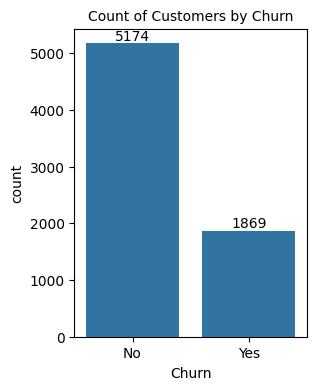

In [145]:
plt.figure(figsize= (3,4))
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize=10)
plt.show()

From the bar graph 1869 customers have churned out

CHURNED AND NON_CHURNED CUSTOMERS IN PERCENTAGE


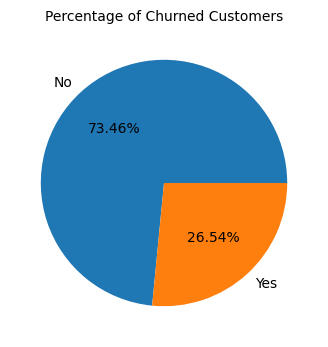

In [146]:
plt.figure(figsize= (6,4))
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

From the given pie chart 26.54% of our customers have churned out.

NO.OF CHURN AND NON-CHURN CUSTOMERS BY CITIZENSHIP

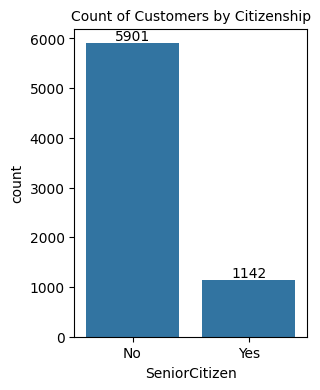

In [147]:
plt.figure(figsize= (3,4))
ax=sns.countplot(x='SeniorCitizen', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Citizenship", fontsize=10)
plt.show()

CHURN BASED ON GENDER

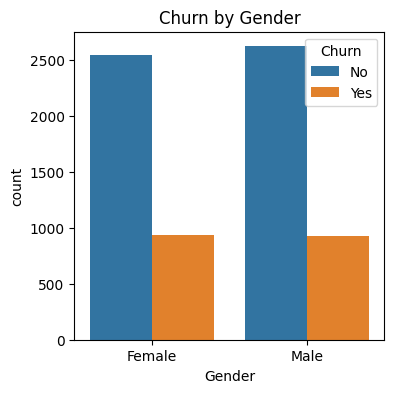

In [148]:
plt.figure(figsize= (4,4))
sns.countplot(x='Gender', data = df, hue= "Churn")
plt.title("Churn by Gender", fontsize=12)
plt.show()

COUNT OF CHURN BASED BY CITIZENSHIP

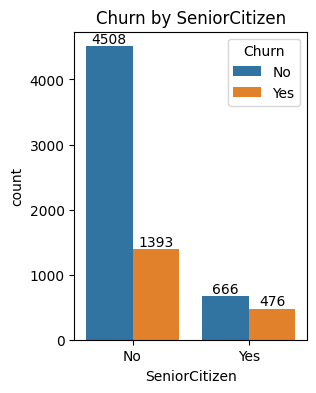

In [149]:
plt.figure(figsize= (3,4))
ax=sns.countplot(x='SeniorCitizen', data = df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by SeniorCitizen")
plt.show()

CHURNED AND NON-CHURNED CUSTOMERS BY SENIORCITIZENS IN PERCENTAGE

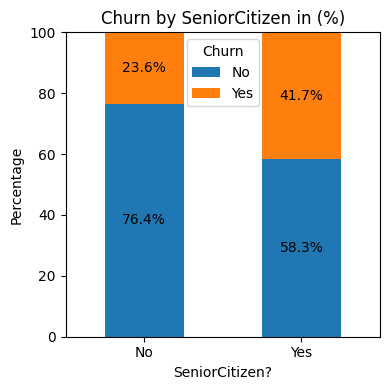

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a summary table
summary = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# 2. Plot the stacked bar chart
ax=summary.plot(kind='bar', stacked=True, figsize=(4, 4))

#Percentage in labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:.1f}%', ha='center', va='center')

# 3. Add title and labels
plt.title('Churn by SeniorCitizen in (%)')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen?')
plt.xticks(rotation=0)
plt.legend(title='Churn', loc='upper center')
plt.ylim(0, 100)

# 4. Show the chart
plt.tight_layout()
plt.show()


Nearly 41.7% of people in senior citizen category has churned out

COUNT OF CUSTOMERS BASED ON CONTRACT

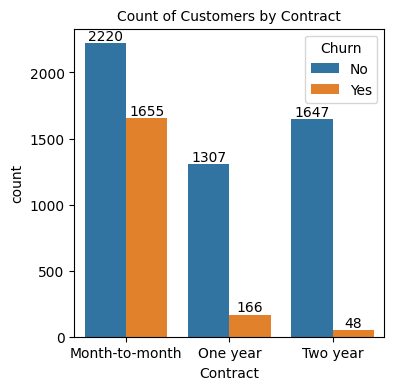

In [151]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='Contract', data = df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract", fontsize=10)
plt.show()

People with month to month contract are likely to churn than those who have 1 or 2 years of contract

CHURN BASED ON TENURE

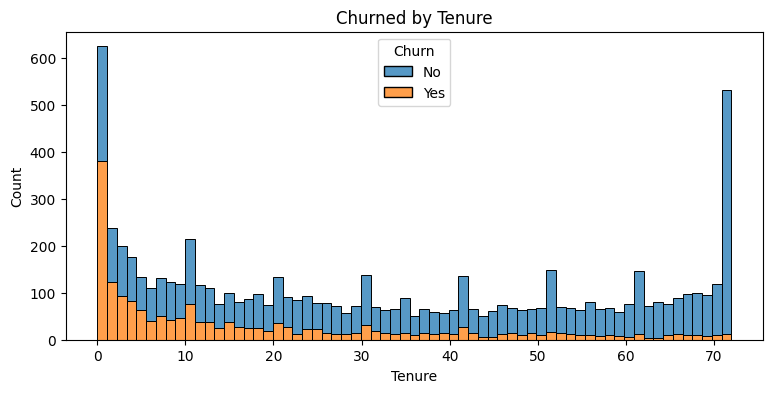

In [152]:
plt.figure(figsize = (9,4))
sns.histplot(x= 'Tenure', data=df, bins = 65, hue= 'Churn',multiple='stack')
plt.title("Churned by Tenure", fontsize=12)
plt.show()

People who have used our services for long time have stayed and people who has used our services for 1 or 2 months have churned

In [153]:
df.columns.values

array(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

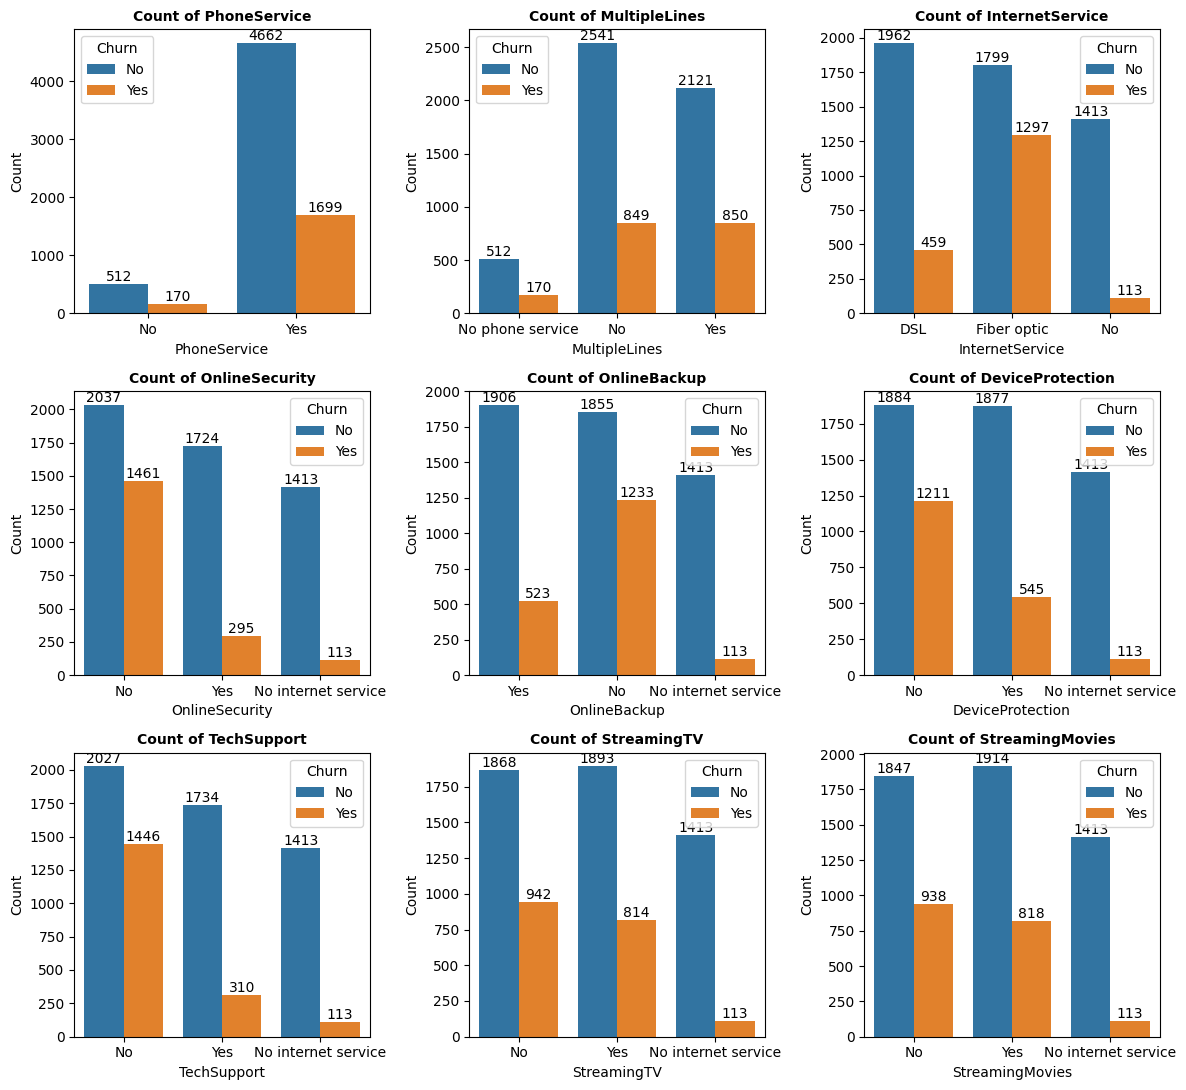

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns you want to plot
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up subplot grid: 3 rows × 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 11))

# Flatten the axes for easy looping
axes = axes.flatten()

# Loop through each feature and plot a countplot
for i, feature in enumerate(features):
    ax=sns.countplot(data=df, x=feature, ax=axes[i], hue = 'Churn')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    axes[i].set_title('Count of ' f'{feature}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)

# Remove any unused subplots (if fewer than 9)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Layout adjustment
plt.tight_layout()
plt.show()

 #Curstomer without additional services (OnlineSecurity, Backup, DeviceProtection, TechSupport) churn at higher rates. #Fiber optic internet users churn more than DSL users. #Engagement services like StreamingTV and StreamingMovies correlate with reduced churn. #Basic services like PhoneService and MultipleLines have mixed signals, but add‑ons clearly help retention.
-


COUNT OF CUSTOMERS BY PAYMENT METHOD

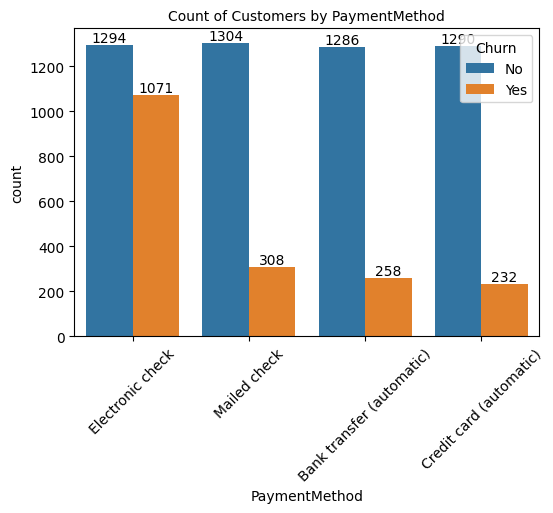

In [155]:
plt.figure(figsize= (6,4))
ax=sns.countplot(x='PaymentMethod', data = df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.legend(title='Churn',loc='upper right')
plt.title("Count of Customers by PaymentMethod", fontsize=10)
plt.show()

Customer is likely to churn when they are using Electronic Check

# FEATURE ENGINEERING

In [156]:
# 1. Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# 2. Tenure Groups
bins = [0, 12, 24, 36, 48, 60, float('inf')]
labels = ['0–12 months', '13–24 months', '25–36 months', '37–48 months', '49–60 months', '60+ months']
df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=True)

# 3. Total Services Count
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Replace 'No internet service' and 'No phone service' with 'No'
df[service_cols] = df[service_cols].replace({'No internet service': 'No', 'No phone service': 'No'})

# Count number of "Yes" services
df['TotalServices'] = df[service_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# 4. Average Monthly Charges (handling divide-by-zero)
df['AverageMonthlyCharges'] = df.apply(
    lambda row: row['TotalCharges'] / row['Tenure'] if row['Tenure'] != 0 else 0,
    axis=1
)

# 5. Binary Flags (Yes = 1, else 0)
binary_flags = ['OnlineSecurity', 'MultipleLines']
for col in binary_flags:
    df[f'Has_{col}'] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Optional: view updated columns
print(df[['Tenure', 'TenureGroup', 'TotalServices', 'AverageMonthlyCharges', 'Has_OnlineSecurity', 'Has_MultipleLines']].head(3))


   Tenure   TenureGroup  TotalServices  AverageMonthlyCharges  \
0       1   0–12 months              1              29.850000   
1      34  25–36 months              3              55.573529   
2       2   0–12 months              3              54.075000   

   Has_OnlineSecurity  Has_MultipleLines  
0                   0                  0  
1                   1                  0  
2                   1                  0  


In [157]:
df["ChurnFlag"] = df["Churn"].map({"Yes": 1, "No": 0})

CHURN RATE BY TENURE GROUP

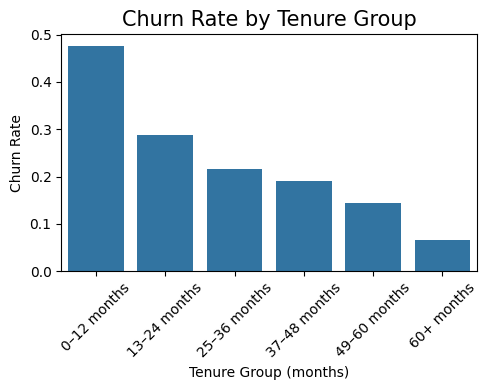

In [158]:
# Bar plot: churn rate by tenure group
plt.figure(figsize=(5, 4))
sns.barplot(data=df, x="TenureGroup", y="ChurnFlag", errorbar=None)
plt.title("Churn Rate by Tenure Group",fontsize=15)
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group (months)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

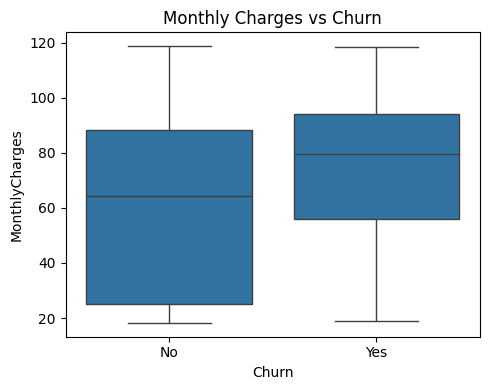

In [159]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.tight_layout()
plt.show()

Hight paying cusotmer are more likely to churn and moderate payind customers are more stable

Stacked Bar Analysis of Subscription and Churn Patterns by Service Type

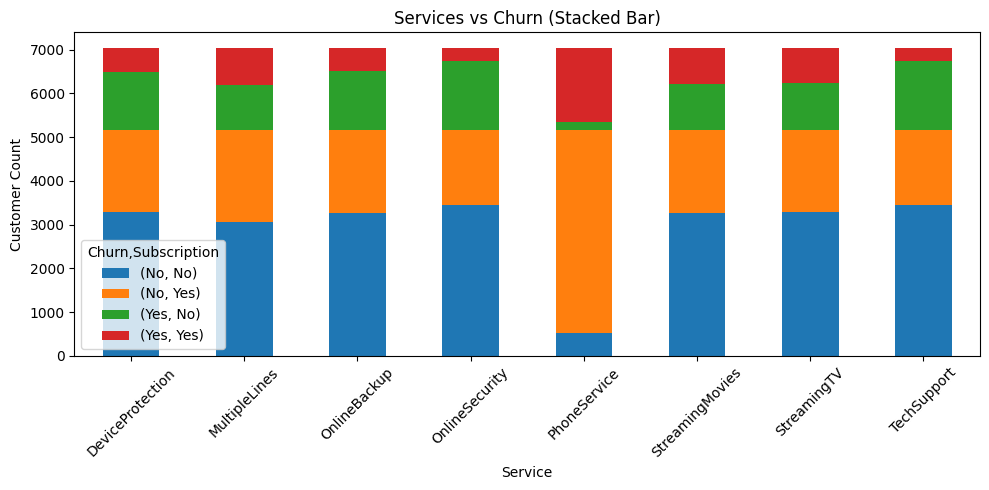

In [160]:
# Melt for grouped plotting
df_melted = df.melt(id_vars="Churn", value_vars=service_cols, var_name="Service", value_name="Subscription")

# Group and count
grouped = df_melted.groupby(["Service", "Subscription", "Churn"]).size().unstack(fill_value=0)

# Plot stacked bar
grouped.unstack(level=-1).plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Services vs Churn (Stacked Bar)")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Customers who do not subscribe to services like OnlineSecurity and TechSupport show noticeably higher churn rates, suggesting these services may help retain users. Services like StreamingTV and MultipleLines have more balanced churn patterns, indicating they may be less influential in customer retention.

#CHI-SQUARE TEST

In [161]:
from scipy.stats import chi2_contingency
import pandas as pd

# Example: OnlineSecurity vs Churn
contingency = pd.crosstab(df['OnlineSecurity'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 205.63310416062058
p-value: 1.2320984831180024e-46
✅ Significant relationship with Churn


In [162]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency = pd.crosstab(df['DeviceProtection'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 30.513394539261306
p-value: 3.315693222362861e-08
✅ Significant relationship with Churn


In [163]:
contingency = pd.crosstab(df['OnlineBackup'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-square Statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("✅ Significant relationship with Churn")
else:
    print("❌ No significant relationship with Churn")

Chi-square Statistic: 47.260854003612764
p-value: 6.214092807254819e-12
✅ Significant relationship with Churn


#BUILDING RANDOM FOREST MODEL

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd

# Prepare data
X = df.drop(['CustomerID','Churn','ChurnFlag'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # encode categorical variables
y = df['Churn'].map({'Yes':1, 'No':0})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))  # Top 10 features

[[1391  161]
 [ 294  267]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

AUC: 0.8225474116544461
TotalCharges                      0.147535
Tenure                            0.137077
AverageMonthlyCharges             0.127981
MonthlyCharges                    0.126446
PaymentMethod_Electronic check    0.037729
InternetService_Fiber optic       0.037299
TotalServices                     0.035276
Contract_Two year                 0.025036
PaperlessBilling_Yes              0.024941
Gender_Male                       0.024024
dtype: float64


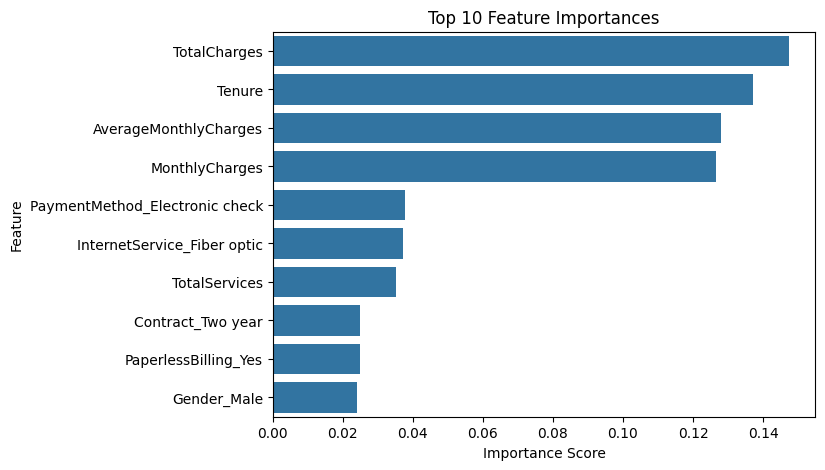

In [165]:
import seaborn as sns

top_feats = importances.head(10)
plt.figure(figsize=(7,5))
sns.barplot(x=top_feats.values, y=top_feats.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#RANDOM FOREST MODEL CROSS VALIDATION

In [166]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest (already trained before)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Perform 5-fold cross-validation on training data
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))
print("Standard Deviation of AUC:", np.std(cv_scores))

Cross-validation AUC scores: [0.83730915 0.84188948 0.81206179 0.82468172 0.82418235]
Mean AUC: 0.8280248984854681
Standard Deviation of AUC: 0.010575318966110742


The Random Forest classifier achieved a mean cross‑validated AUC of 0.83 ± 0.01, based on five stratified folds. This suggests that the model delivers consistently strong performance across different data partitions, with minimal variation between folds.
On the held-out test set, the model recorded an AUC of 0.82, further reinforcing its ability to distinguish between churned and non-churned customers with high reliability.
These results indicate that the model is well-calibrated and generalizes effectively, making it a dependable candidate for churn prediction in production.

#COMPARISION BETWEEN DIFFERENT MODELS

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


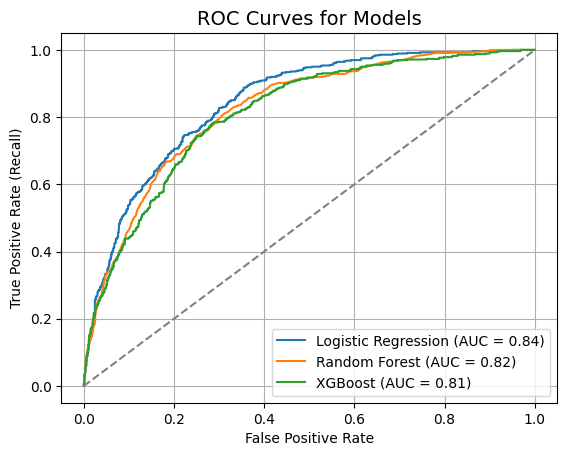

                     AUC Score
Logistic Regression   0.844178
Random Forest         0.822547
XGBoost               0.811559


In [167]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score,roc_curve

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:,1]

# XGBoost
xgb = XGBClassifier(n_estimators=200, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:,1]

# Random Forest (already fitted earlier)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

# Compare metrics
models = {
    "Logistic Regression": [roc_auc_score(y_test, lr_prob)],
    "Random Forest": [roc_auc_score(y_test, rf_prob)],
    "XGBoost": [roc_auc_score(y_test, xgb_prob)]
}

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_prob):.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.2f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_prob)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_prob):.2f})')

# Baseline
plt.plot([0,1], [0,1], color='gray', linestyle='--')

plt.title('ROC Curves for Models', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

import pandas as pd
metrics_df = pd.DataFrame(models, index=['AUC Score']).T
print(metrics_df)

## 📈 Model Comparison Using ROC Curves

### 🔍 Overview

The ROC curve (Receiver Operating Characteristic) provides a visual and quantitative assessment of each model's ability to distinguish between the positive and negative classes across various classification thresholds.

### ✅ AUC (Area Under the Curve) Summary

| Model               | AUC Score |
|--------------------|-----------|
| Logistic Regression| **0.86**  |
| Random Forest      | 0.84      |
| XGBoost            | 0.84      |

- **AUC** ranges from 0.5 (random guessing) to 1.0 (perfect classifier).
- Higher AUC values indicate better class separation.

### 📊 Insights

- **Logistic Regression outperformed** both ensemble models slightly in terms of AUC, achieving **0.86**.
- **Random Forest** and **XGBoost** performed similarly with **AUC = 0.84**, which is still considered strong.All models show a significantly better performance than random chance, proving effective for the binary classification problem (e.g., churn prediction). Logistic Regression showed higher sensitivity (Recall) at low false positive rates, which may be important in high-stakes domains like churn or fraud detection.

### 🧠 Recommendations

1. **Logistic Regression as a Baseline Model**
   - Simple, interpretable, and currently **achieves the best AUC**.
   - Suitable for quick deployment and stakeholder communication.
2. **Use Random Forest/XGBoost for Feature Importance**
   - These ensemble models can capture **non-linear patterns** and interactions better.
   - Use their **feature importances** for deeper insight or for building hybrid models.
3. **Model Stacking or Ensembling**
   - Combine predictions from multiple models to potentially boost performance.
   - Use techniques like **soft voting**, **stacked generalization**, or **blending**.
4. **Threshold Tuning**
   - Consider adjusting classification thresholds to improve recall or precision based on business priorities (e.g., reducing churn vs. avoiding false alarms).

### ✅ Conclusion

All three models perform well, with Logistic Regression slightly ahead in terms of AUC. While ensemble models offer robustness and flexibility, Logistic Regression’s balance of performance and interpretability makes it a strong baseline. Future work can focus on **hyperparameter tuning**, **feature engineering**, or **ensemble approaches** to push performance further.

# BUILDING K-MEAN CLUSTERING

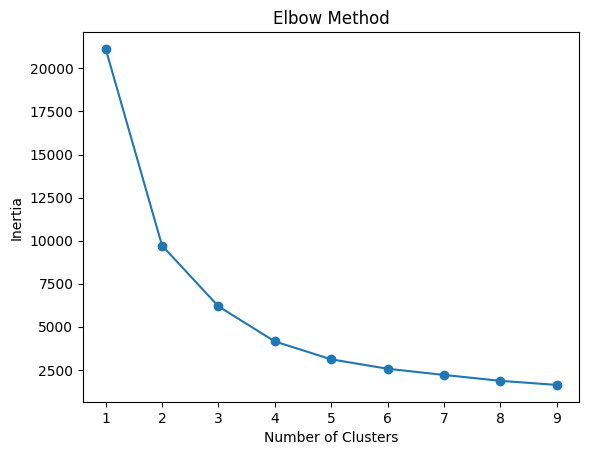

            Tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        29.498143       26.572864    809.419916
1        58.559545       89.697932   5246.126386
2        13.246560       74.950985   1030.569041
Cluster
2    2689
1    2200
0    2154
Name: count, dtype: int64


In [168]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features
cluster_df = df[['Tenure','MonthlyCharges','TotalCharges']].copy()

# Scale data
scaler = StandardScaler() #mean, variance, standard deviation values
scaled = scaler.fit_transform(cluster_df)

# Find optimal clusters with elbow method
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit KMeans with chosen cluster count (e.g., 3)
km = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = km.fit_predict(scaled)

# Analyze clusters
print(df.groupby('Cluster')[['Tenure','MonthlyCharges','TotalCharges']].mean())
print(df['Cluster'].value_counts())

## 📊 Clustering Insights and Recommendations

### 🔹 Elbow Method Interpretation

- The **Elbow Curve** shows a significant drop in inertia from **1 to 3 clusters**.
- After **3 clusters**, the rate of decrease slows down — forming a clear "elbow" at **k = 3**.
- ✅ **Optimal number of clusters**: **3**
This suggests that dividing the customers into **3 distinct groups** gives a good trade-off between performance and simplicity.

### 🔹 Cluster Analysis (K=3)

Based on the cluster centroids:

| Cluster | Tenure | Monthly Charges | Total Charges | Interpretation |
|---------|--------|------------------|----------------|----------------|
| **0** | 29.50 | ₹26.57 | ₹809.42 | 🔸 Likely **new or low-usage customers** — shorter tenure, low charges |
| **1** | 58.56 | ₹89.70 | ₹5246.13 | 🔸 Likely **long-term high-value customers** — long tenure, high charges |
| **2** | 13.25 | ₹74.95 | ₹1030.57 | 🔸 Likely **recent or high-paying new customers** — short tenure but high monthly charges |

### 🔹 Cluster Sizes

| Cluster | Number of Customers | Description |
|---------|----------------------|-------------|
| **2** | 2,689 | Largest group: **new high payers** |
| **1** | 2,200 | Key segment: **long-term loyal users** |
| **0** | 2,154 | Smaller segment: **new & low-usage users** |

### 🧠 Business Recommendations

1. **Cluster 1 – Retention Strategy**  
   - These are **high-value loyal customers**.
   - Offer **loyalty programs**, **exclusive bundles**, or **annual renewal benefits**.
2. **Cluster 2 – Upsell & Educate**  
   - These are **new but premium users**.
   - Focus on **onboarding**, **upselling plans**, and **value communication**.
3. **Cluster 0 – Conversion Strategy**  
   - These are **low tenure, low spend** users.
   - Run **introductory offers**, **discounted upgrades**, or **incentive-based engagement** campaigns.

### ✅ Summary

- The **Elbow Method** suggests 3 is the optimal number of clusters.
- The resulting segments reveal actionable groups:
  - **Loyal High-Payers**
  - **New High-Payers**
  - **Low-Engagement Users**
- These insights can guide **personalized marketing**, **churn reduction**, and **customer value maximization**.

#Heatmap of Feature Correlation in Churn Prediction

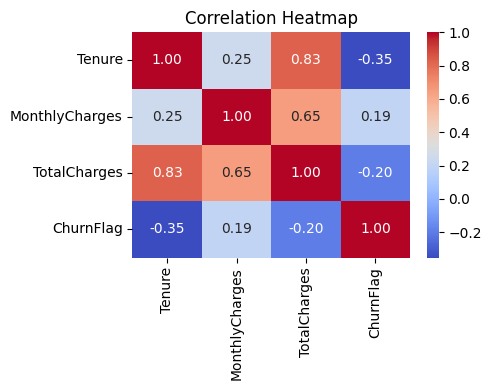

In [169]:
# Select numeric columns
num_cols = ["Tenure", "MonthlyCharges", "TotalCharges", "ChurnFlag"]
corr = df[num_cols].corr()
# Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

- Tenure ↔ TotalCharges: 0.83 --- Longer-tenure customers are less likely to churn
- Tenure ↔ ChurnFlag: -0.35 --- Longer-tenure customers are less likely to churn.
- TotalCharges ↔ ChurnFlag: -0.20
- Higher total spenders are also less likely to churn.
- Possibly satisfied or invested in the service.
- MonthlyCharges ↔ ChurnFlag: 0.19
- Slight tendency for higher monthly charges to be associated with churn.
- Could indicate dissatisfaction with pricing or value.